# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research<br>BiLSTM Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# **Model BILSTM ARCHITECTURE**

<center>
<img src="https://lh3.googleusercontent.com/fife/AAWUweWDwRoR324ERKkyG4qYdbA4xsgCFVdBF-bAARNYjqVSnojQMYVEKMfYIg1sjGr1Owk343_CSNhH4XKJjoBDErW1AzH-0nAKf-x6ac4lv0zRbm0MH0XjvlqkhfKAlw9dHWsSsZ_5uKl_Rg08tJ9eR4qtJI5-y1tqJMXmgagO4YQI67FZLuyJqctLBJ7cZxQ15ax9-0ejuo8GTuL0PsZB3WLRH0FNNWWQ5pUcwB5EctMNfdl411V2VSuTA4Iz8VfZujDuRfU8FNs0JrGw6zRlPGL5wrUlhLU4KI0MyYbBYegq9_vK0biq2LC5UfjBqLYwvI5C89FeLAYHlG-y0pjpPLXD7f3aLOAbZu19PtKBFRehp0pYipizg-RbLAxS5PogG5xFdLehIGeZS4g2qii1kCd-THx2bH-8s8qb0ZhkA8wAdFj0pyLg8sdPMH5V606cmJLwNO1yuAV1LbXcTaS_UsCx27OU4SBRPXEgrBO0nS70sxlSBTFzsOpQ1PZLfnefFkCATQkmLpVvOtrmF3qbKDI7vJtA4rzHbT0eOis7zReM3fyDCtzA0mjvU2J2XAXznn1E85h6OHo3ZL_WQZVPO2xxT34f9lMySP9WK51xfi5-qAyFfgBeQf-8kRRUxQIedtk7V07bhbxeOTq-WHpmXjYDaRN9UxUNS5sDH9QJAU2WnpX_2bKSgoGqvh2iotrQ-eTL_ocX8AWr4No28UklOEFDQEVYZBzP6cq0ZrhxDtLUZDLS_gw0w46z4egWSO2mtVc2cp9PAHCRSXLR0o4_olVENVGXJcuFNh_ZUaslzrt6YhHh1GUb1D-1tT9NEN3WsSstsmHgS28BDioaHPBc98pjgr3zCTQnwpAQDy6T6wVtm_2SYrcYJutU2kT53x_4HHx0tYw8FSEM3bAv9qwtYzG1hubHgHydyin0SHixT78RBI_oG6ogBDqiGIIGby1H6T3j-nSxVuzpq8lS1vPV2N5iyBpkLXp84j389hprZcYOzQnNIz494-S8vA7fVlBhFBkWRFcoNTrANq6EWUUZfoqhxthJIRg54_rsg_daR2c2BKM40FVYd2RSl7_eV-cMem_QdpQeD3YrYJkUDxg0PpHTSGA1eIEJCUe5w9yjS_NOWNbtpuRZzR82_nSFmatOem1NKffnWtnl5R5xCQGTEco6HaRmWyeYBYL0IlLZI2HzbHQKFWR5-byMexQFJVSE_Mca6K_-L7Dmhl0aDmIENxsTRVN-vRLf7t-CVPvi9Yn5FhfWkzj71a-0oQim35RUVLHUd0BSOMvf01NjK6CFkTdpIECRx5ZJj6GpdQZr5zZyS4z6D_dH631D5FtTb_1LmffzzY5-gFEbw7R6mVOkYJGALAjciHK4pIgd91d9wP2fzYarXYPA=w1366-h635" widht=250>
</center>

# **Source Code And Output**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install tensorflow==2.2.0
! pip install keras==0.23.1
! pip install git+https://www.github.com/keras-team/keras-contrib.git
! pip install seqeval
! pip install pickle5

In [ ]:
! pip install sklearn-crfsuite
! pip install numpy==1.19.5

# **After Install Package, Restart Runtime**

In [4]:
import os
import numpy as np 
import pandas as pd
import tensorflow

from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.utils import plot_model

from numpy.random import seed

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/input/ner_dataset.csv')

In [6]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 0,studies,NNS,O
1,Sentence: 0,on,IN,O
2,Sentence: 0,magnesium,NN,O
3,Sentence: 0,s,NN,O
4,Sentence: 0,mechanism,NN,O
5,Sentence: 0,of,IN,O
6,Sentence: 0,action,NN,O
7,Sentence: 0,in,IN,O
8,Sentence: 0,digitalis,NN,plant
9,Sentence: 0,induced,VBD,O


In [7]:
df.tail(20)

,Sentence #,Word,POS,Tag
31674,Sentence: 1309,of,IN,O
31675,Sentence: 1309,the,DT,O
31676,Sentence: 1309,variance,NN,O
31677,Sentence: 1309,in,IN,O
31678,Sentence: 1309,cannabis,NN,plant
31679,Sentence: 1309,use,NN,O
31680,Sentence: 1309,these,DT,O
31681,Sentence: 1309,findings,NNS,O
31682,Sentence: 1309,suggest,VBP,O
31683,Sentence: 1309,that,IN,O


In [8]:
df.nunique()

Sentence #    1310
Word          3089
POS             32
Tag              3
dtype: int64

In [9]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

In [10]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[1]

'the mechanism by which magnesium affects digitalis induced arrhythmias was studied in dogs with and without beta receptor'

In [11]:
sent = getter.get_text()
print(sent)

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [12]:
sentences = getter.sentences

In [13]:
words = list(df['Word'].unique())
tags = list(df['Tag'].unique())
    
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

tag_to_index = {t : i + 1 for i, t in enumerate(tags)}
tag_to_index["PAD"] = 0

idx2word = {i: w for w, i in word_to_index.items()}
idx2tag = {i: w for w, i in tag_to_index.items()}

In [14]:
seqs_length = [len(s) for s in sentences]
max_seq_length = max(seqs_length)
print(f"Max sequence length: {max_seq_length}")

num_words = len(words)
print(f"Number of words: {num_words}")

num_tags = len(tags)
print(f"Number of tags: {num_tags}")

Max sequence length: 101
Number of words: 3089
Number of tags: 3


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
sentences = getter.sentences

In [17]:
X = [[word_to_index[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_seq_length, sequences = X, padding = "post", value = word_to_index["PAD"])

In [18]:
y = [[tag_to_index[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_seq_length, sequences = y, padding = "post", value = tag_to_index["PAD"])

In [19]:
y = [to_categorical(i, num_classes = num_tags + 1) for i in y]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)

In [21]:
print("Size of training input data : ", X_train.shape)
print("Size of training output data : ", np.array(y_train).shape)
print("Size of testing input data : ", X_test.shape)
print("Size of testing output data : ", np.array(y_test).shape)

Size of training input data :  (1179, 101)
Size of training output data :  (1179, 101, 4)
Size of testing input data :  (131, 101)
Size of testing output data :  (131, 101, 4)


In [22]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

_input = Input(shape=(max_seq_length,))
_embed = Embedding(input_dim=num_words + 2, output_dim = max_seq_length, input_length=max_seq_length)(_input)
_embed = Dropout(0.2)(_embed)
_arch = Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.1))(_embed)
_output = TimeDistributed(Dense(num_tags + 1, activation="softmax"))(_arch)  # softmax output layer

model = Model(_input, _output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 101)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 101, 101)          312191    
_________________________________________________________________
dropout (Dropout)            (None, 101, 101)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 101, 256)          235520    
_________________________________________________________________
time_distributed (TimeDistri (None, 101, 4)            1028      
Total params: 548,739
Trainable params: 548,739
Non-trainable params: 0
_________________________________________________________________


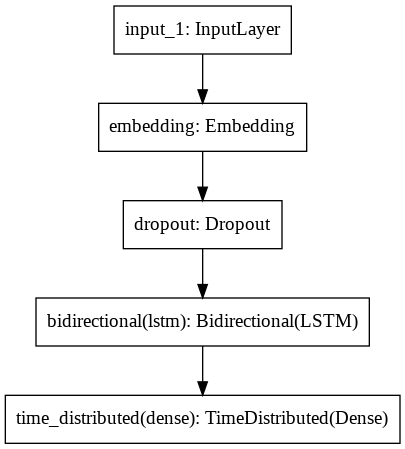

In [23]:
plot_model(model)

In [24]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2,verbose = 1,mode = 'min',restore_best_weights = True)

checkpointer = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/output/model-{val_accuracy:.2f}.hdf5', 
    verbose = 1, 
    mode = 'min', 
    save_best_only = True, 
    monitor='val_loss')

# callbacks = [checkpointer]

history = model.fit(
    X_train,np.array(y_train),
    validation_split =0.1,
    batch_size = 16,
    epochs = 20,
    callbacks = [checkpointer]
)

Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.9174
Epoch 00001: val_loss improved from inf to 0.12245, saving model to /content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/output/model-0.97.hdf5
67/67 [==============================] - 28s 414ms/step - loss: 0.3176 - accuracy: 0.9174 - val_loss: 0.1224 - val_accuracy: 0.9703
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9707
Epoch 00002: val_loss improved from 0.12245 to 0.10131, saving model to /content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/output/model-0.97.hdf5
67/67 [==============================] - 19s 281ms/step - loss: 0.1120 - accuracy: 0.9707 - val_loss: 0.1013 - val_accuracy: 0.9709
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.0833 - accuracy: 0.9722
Epoch 00003: val_loss improved from 0.10131 to 0.06777, saving model to /content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/output/model-0.98.hdf5
67/67 [=========================

In [26]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Rearch_Dimas/BILSTM-NER/output/model-0.98.hdf5')

In [27]:
model.evaluate(X_test,np.array(y_test))
loss, accuracy = model.evaluate(X_test,np.array(y_test), verbose=0)

5/5 [==============================] - 0s 31ms/step - loss: 0.0393 - accuracy: 0.9838


In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [29]:
y_test_true = np.argmax(y_test, -1)

In [30]:
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [31]:
print(y_pred)

[['O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'O', 'O', 'O', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'], ['plant', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'O', 'disease', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PA

In [32]:
print(y_test_true)

[['O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'], ['plant', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'O', 'O', 'O', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'P

In [33]:
import pandas as pd
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

scores_classification_reports = classification_report(y_test_true, y_pred, output_dict=True)
df_data_scores = pd.DataFrame(scores_classification_reports).transpose()
df_data_scores = df_data_scores.rename_axis('Entities')
print(df_data_scores)

              precision    recall  f1-score  support
Entities                                            
AD             0.976923  0.976923  0.976923    130.0
isease         0.460432  0.450704  0.455516    142.0
lant           0.854962  0.829630  0.842105    135.0
micro avg      0.757500  0.744472  0.750929    407.0
macro avg      0.764106  0.752419  0.758181    407.0
weighted avg   0.756268  0.744472  0.750289    407.0


In [34]:
print("F1-score: {:.1%}".format(f1_score(y_test_true, y_pred)))

F1-score: 75.1%


In [35]:
i = np.random.randint(0,X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))

print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
  if w != 0:
    if words[w-2] != "predicting":
      print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

Sample number 2 of 131 (Test Set)
Word           ||True ||Pred
background     : O     O
and            : O     O
aims           : O     O
large          : O     O
scale          : O     O
epidemiological: O     O
studies        : O     O
have           : O     O
shown          : O     O
that           : O     O
drinking       : O     O
more           : O     O
than           : O     O
two            : O     O
cups           : O     O
of             : O     O
coffee         : plant plant
per            : O     O
day            : O     O
reduces        : O     O
the            : O     O
risks          : O     O
hepatitis      : disease O
liver          : O     O


In [36]:
import pickle

In [37]:
with open('/content/drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-NER/output/word_to_index.pickle', 'wb') as f:
  pickle.dump(word_to_index, f)

with open('/content/drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-NER/output/tag_to_index.pickle', 'wb') as f:
  pickle.dump(tag_to_index, f)

with open('/content/drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-NER/output/words.pickle', 'wb') as f:
  pickle.dump(words, f)

with open('/content/drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-NER/output/tags.pickle', 'wb') as f:
  pickle.dump(tags, f)

FileNotFoundError: ignored